In [9]:
# Identify how many types 1 types 2 are there?

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
import statsmodels.api as sm

df = pd.read_csv('pokemon.csv', encoding = "ANSI")
df.head()

,#,NAME_ENGLISH,NAME_GERMAN,NAME_FRENCH,NAME_JAPAN,NAME_KOREAN,TYP1,TYP2,GENERATION,CANDY,BUDDY_DISTANCE,MAX_HP,MAX_ATT,MAX_DEF,MAX_CP,CATCH_RATE,ESCAPE_RATE,SHINY,ICON_PATH,SPRITE_PATH
0,1,Bulbasaur,Bisasam,Bulbizarre,Fushigidane,Isanghaessi,Grass,Poison,1.0,25.0,3.0,128.0,118.0,111.0,1115.0,"20,00 %","10,00 %",Yes,./icon/001.png,./sprites/001.png
1,2,Ivysaur,Bisaknosp,Herbizarre,Fushigisou,Isanghaepul,Grass,Poison,1.0,100.0,3.0,155.0,151.0,143.0,1699.0,"10,00 %","7,00 %",Yes,./icon/002.png,./sprites/002.png
2,3,Venusaur,Bisaflor,Florizarre,Fushigibana,Isanghaekkot,Grass,Poison,1.0,NaN,3.0,190.0,198.0,189.0,2720.0,"5,00 %","5,00 %",Yes,./icon/003.png,./sprites/003.png
3,4,Charmander,Glumanda,Salamèche,Hitokage,Pairi,Fire,NaN,1.0,25.0,3.0,118.0,116.0,93.0,980.0,"20,00 %","10,00 %",Yes,./icon/004.png,./sprites/004.png
4,5,Charmeleon,Glutexo,Reptincel,Lizardo,Rijadeu,Fire,NaN,1.0,100.0,3.0,151.0,158.0,126.0,1653.0,"10,00 %","7,00 %",Yes,./icon/005.png,./sprites/005.png


In [2]:
len(df['TYP1'].value_counts())

18

In [3]:
len(df['TYP2'].value_counts())

18

In [4]:
# Create an explanatory model that the "target" is the "Max Power of Combat". Choose the features. It
# is suggested: Maximo of life, maximum damage and maximum defense. Use multiple models,
# including regressions.

Y = df['MAX_CP']
X = df.iloc[:,11:14]
print(X)

     MAX_HP  MAX_ATT  MAX_DEF
0     128.0    118.0    111.0
1     155.0    151.0    143.0
2     190.0    198.0    189.0
3     118.0    116.0     93.0
4     151.0    158.0    126.0
5     186.0    223.0    173.0
6     127.0     94.0    121.0
7     153.0    126.0    155.0
8     188.0    171.0    207.0
9     128.0     55.0     55.0
10    137.0     45.0     80.0
11    155.0    167.0    137.0
12    120.0     63.0     50.0
13    128.0     46.0     75.0
14    163.0    169.0    130.0
15    120.0     85.0     73.0
16    160.0    117.0    105.0
17    195.0    166.0    154.0
18    102.0    103.0     70.0
19    102.0    103.0     70.0
20    146.0    161.0    139.0
21    181.0    135.0    154.0
22    120.0    112.0     60.0
23    163.0    182.0    133.0
24    111.0    110.0     97.0
25    155.0    167.0    153.0
26    111.0    112.0     96.0
27    155.0    193.0    151.0
28    155.0    201.0    154.0
29    137.0    126.0    120.0
..      ...      ...      ...
812     NaN      NaN      NaN
813     Na

In [5]:
X = X.dropna()
Y = Y.dropna()
X

,MAX_HP,MAX_ATT,MAX_DEF
0,128.0,118.0,111.0
1,155.0,151.0,143.0
2,190.0,198.0,189.0
3,118.0,116.0,93.0
4,151.0,158.0,126.0
5,186.0,223.0,173.0
6,127.0,94.0,121.0
7,153.0,126.0,155.0
8,188.0,171.0,207.0
9,128.0,55.0,55.0


In [7]:
X = sm.add_constant(X)

In [8]:
model = sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 MAX_CP   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     4812.
Date:                Thu, 28 Nov 2019   Prob (F-statistic):               0.00
Time:                        11:13:05   Log-Likelihood:                -3457.5
No. Observations:                 528   AIC:                             6923.
Df Residuals:                     524   BIC:                             6940.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1297.6080     28.883    -44.927      0.000   -1354.348   -1240.868
MAX_HP         4.6403      0.155     29.990      0.000       4.336       4.944
MAX_ATT       10.4325      0.151     69.319      0.000      10.137      10.728
MAX_DEF        5.2694      0.155     34.033      0.000       4.965       5.574
==============================================================================
Omnibus:                      258.997   Durbin-Watson:                   1.536
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5459.330
Skew:                          -1.642   Prob(JB):                         0.00
Kurtosis:                      18.407   Cond. No.                     1.08e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Analyze whether independent variables should be eliminated. For example, if they have reduced
# variability or if they are too correlated with each other. 

# The R-square is 0.965, this means that the independent variables explain the dependetn variable.

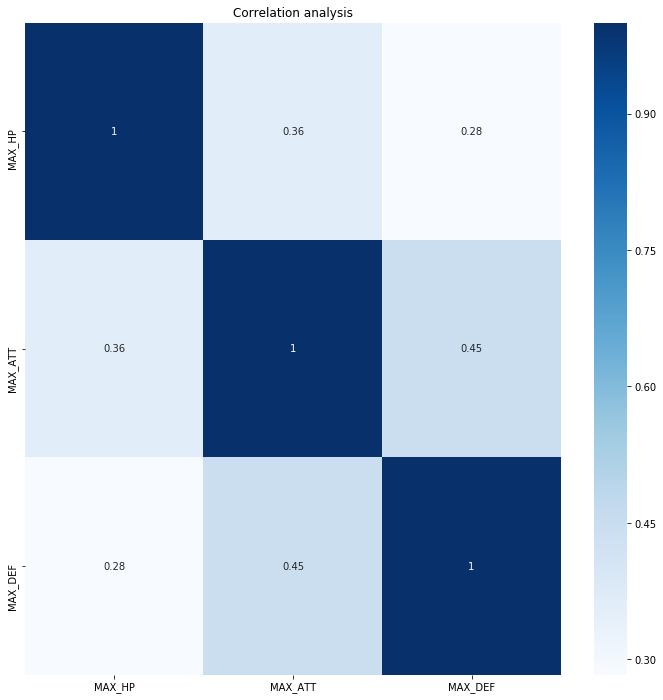

In [11]:
# Correlation
import seaborn as sns
import matplotlib.pyplot as plt

XY = df.iloc[:, 11:14] # if I don't do this, the graph will show the constant
fig = plt.figure(figsize=[12, 12])
corr_mtx = XY.corr()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Correlation analysis')
plt.show()

# The correlation isn't important.